In [1]:
%matplotlib inline
from astropy.io import fits, ascii
from astropy.table import Table
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

# CIV, OIII stack 

## Mean stack

        Use Gaussian1D and subtract it off Const1D instead. [astropy.utils.decorators]
        Use Gaussian1D and subtract it off Const1D instead.
        Use Gaussian1D and subtract it off Const1D instead. [astropy.utils.decorators]
        Use Gaussian1D and subtract it off Const1D instead.


('Centroid velocity in km/s = ', Parameter('mean_1', value=129.691196823))


<CompoundModel77(amplitude_0=0.9821739220408479, amplitude_1=0.11820669961932903, mean_1=129.69119682316008, stddev_1=254.62473617349477, amplitude_2=0.1181, mean_2=627.6911968231601, stddev_2=254.62473617349477)>

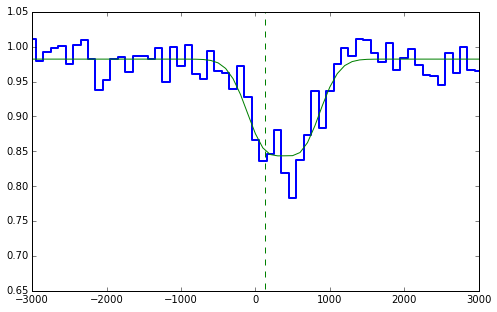

In [40]:
stack = fits.open('Output/QPQ9_zOIII_1548_mean.fits')
relativistic_equiv = u.doppler_relativistic(1548.195*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_1548_init = models.GaussianAbsorption1D(amplitude=0.1,mean=243.,stddev=235.)
g_1550_init = models.GaussianAbsorption1D(amplitude=0.05,mean=243.+498.,stddev=235.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*g_1548_init*g_1550_init
def tie_mean2(model):
    mean_2 = model.mean_1 + 498.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
def tie_amplitude2(model):
    amplitude_2 = model.amplitude_1*0.5
    return amplitude_2
#model_init.amplitude_2.tied = tie_amplitude2
model_init.amplitude_2.bounds = [0.,0.1181]
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo.value,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CIV_OIII_mean_fit.dat')
model_final

## Median stack

        Use Gaussian1D and subtract it off Const1D instead. [astropy.utils.decorators]
        Use Gaussian1D and subtract it off Const1D instead.
        Use Gaussian1D and subtract it off Const1D instead. [astropy.utils.decorators]
        Use Gaussian1D and subtract it off Const1D instead.


('Centroid velocity in km/s = ', Parameter('mean_1', value=210.120080663))


<CompoundModel101(amplitude_0=0.98, amplitude_1=0.04822334177964836, mean_1=210.12008066250974, stddev_1=211.3376373411521, amplitude_2=0.0482, mean_2=708.1200806625097, stddev_2=211.3376373411521)>

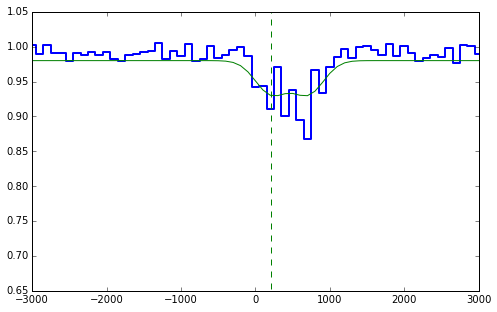

In [52]:
stack = fits.open('Output/QPQ9_zOIII_1548_med.fits')
relativistic_equiv = u.doppler_relativistic(1548.195*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_1548_init = models.GaussianAbsorption1D(amplitude=0.1,mean=243.,stddev=235.)
g_1550_init = models.GaussianAbsorption1D(amplitude=0.05,mean=243.+498.,stddev=235.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*g_1548_init*g_1550_init
model_init.amplitude_0.fixed = True
def tie_mean2(model):
    mean_2 = model.mean_1 + 498.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
def tie_amplitude2(model):
    amplitude_2 = model.amplitude_1*0.5
    return amplitude_2
#model_init.amplitude_2.tied = tie_amplitude2
model_init.amplitude_2.bounds = [0,0.0482]
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo.value,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
# for some reason this line failed
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CIV_OIII_median_fit.dat')
model_final

# CIV, MgII stack

## Mean stack

        Use Gaussian1D and subtract it off Const1D instead. [astropy.utils.decorators]
        Use Gaussian1D and subtract it off Const1D instead.
        Use Gaussian1D and subtract it off Const1D instead. [astropy.utils.decorators]
        Use Gaussian1D and subtract it off Const1D instead.


('Centroid velocity in km/s = ', Parameter('mean_1', value=10.8885423697))


<CompoundModel97(amplitude_0=0.982702532525435, amplitude_1=0.059012464541401986, mean_1=10.888542369697745, stddev_1=302.5783798023647, amplitude_2=0.0589, mean_2=508.88854236969775, stddev_2=302.5783798023647)>

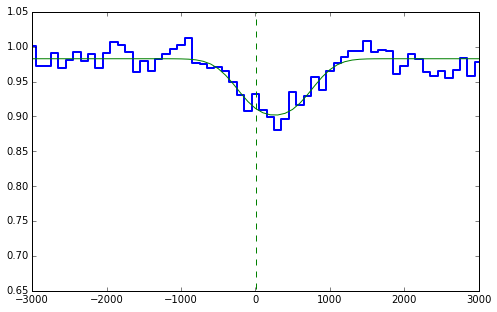

In [50]:
stack = fits.open('Output/QPQ9_zIRMgII_1548_mean.fits')
relativistic_equiv = u.doppler_relativistic(1548.195*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_1548_init = models.GaussianAbsorption1D(amplitude=0.1,mean=100,stddev=300.)
g_1550_init = models.GaussianAbsorption1D(amplitude=0.05,mean=100.+498.,stddev=300.)
c_init = models.Const1D(amplitude=0.97)
model_init = c_init*g_1548_init*g_1550_init
def tie_mean2(model):
    mean_2 = model.mean_1 + 498.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
def tie_amplitude2(model):
    amplitude_2 = model.amplitude_1*0.5
    return amplitude_2
#model_init.amplitude_2.tied = tie_amplitude2
model_init.amplitude_2.bounds = [0.0,0.0589]
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo.value,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CIV_MgII_mean_fit.dat')
model_final

        Use Gaussian1D and subtract it off Const1D instead. [astropy.utils.decorators]
        Use Gaussian1D and subtract it off Const1D instead.
        Use Gaussian1D and subtract it off Const1D instead. [astropy.utils.decorators]
        Use Gaussian1D and subtract it off Const1D instead.


('Centroid velocity in km/s = ', Parameter('mean_1', value=188.718296072))


<CompoundModel93(amplitude_0=0.9903488455071711, amplitude_1=0.052320896014269994, mean_1=188.7182960724386, stddev_1=217.74500646751858, amplitude_2=0.0251, mean_2=686.7182960724385, stddev_2=217.74500646751858)>

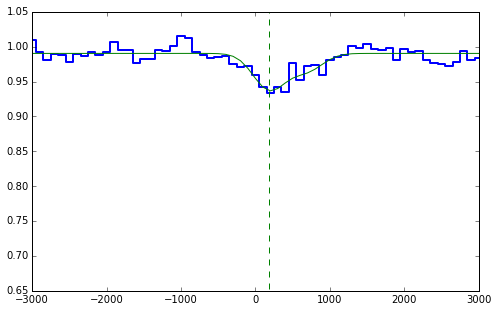

In [48]:
stack = fits.open('Output/QPQ9_zIRMgII_1548_med.fits')
relativistic_equiv = u.doppler_relativistic(1548.195*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_1548_init = models.GaussianAbsorption1D(amplitude=0.1,mean=100,stddev=235.)
g_1550_init = models.GaussianAbsorption1D(amplitude=0.05,mean=100.+498.,stddev=235.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*g_1548_init*g_1550_init
def tie_mean2(model):
    mean_2 = model.mean_1 + 498.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
def tie_amplitude2(model):
    amplitude_2 = model.amplitude_1*1
    return amplitude_2
#model_init.amplitude_2.tied = tie_amplitude2
model_init.amplitude_2.bounds = [0.0251,1]
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo.value,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CIV_MgII_median_fit.dat')
model_final

# CII, OIII stack

## Mean stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=235.037402947))
('Error in centroid and dispersion = ', 21.758647982507323, 23.176250127508062)


<CompoundModel48(amplitude_0=0.9828063290869944, amplitude_1=0.17186703613569365, mean_1=235.0374029468159, stddev_1=329.8439971881484)>

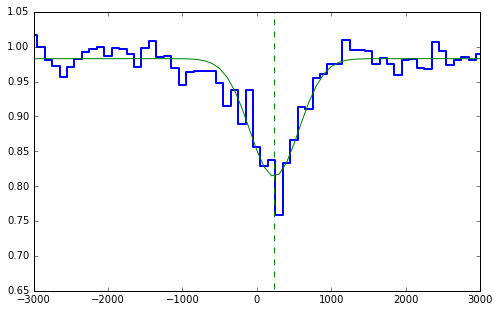

In [28]:
stack = fits.open('Output/QPQ9_zOIII_1334_mean.fits')
relativistic_equiv = u.doppler_relativistic(1334.5323*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_init = models.GaussianAbsorption1D(amplitude=0.2,mean=170.,stddev=388.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*g_init
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CII_OIII_mean_fit.dat')
model_final

## Median stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=255.838082952))
('Error in centroid and dispersion = ', 13.16595812450697, 13.449199181020159)


<CompoundModel49(amplitude_0=0.9893749229146203, amplitude_1=0.08999249475202964, mean_1=255.83808295245916, stddev_1=103.40726151672845)>

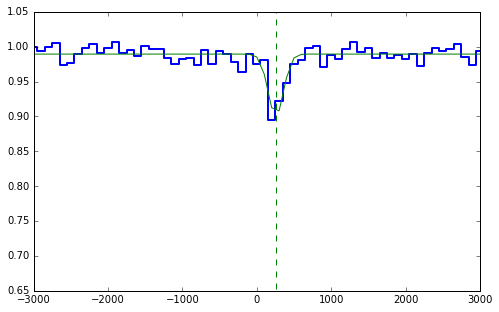

In [29]:
stack = fits.open('Output/QPQ9_zOIII_1334_med.fits')
relativistic_equiv = u.doppler_relativistic(1334.5323*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_init = models.GaussianAbsorption1D(amplitude=0.2,mean=257.,stddev=268.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*g_init
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CII_OIII_median_fit.dat')
model_final

# CII, MgII stack 

## Mean stack

        Use Gaussian1D and subtract it off Const1D instead. [astropy.utils.decorators]
        Use Gaussian1D and subtract it off Const1D instead.


('Centroid velocity in km/s = ', Parameter('mean_1', value=232.055835549))
('Error in amplitude =', 0.0086416088033910189)
('Error in centroid and dispersion = ', 25.110258698775155, 26.507569045633456)


<CompoundModel35(amplitude_0=0.9747193419873246, amplitude_1=0.11493358237491968, mean_1=232.05583554865098, stddev_1=293.0484211777181)>

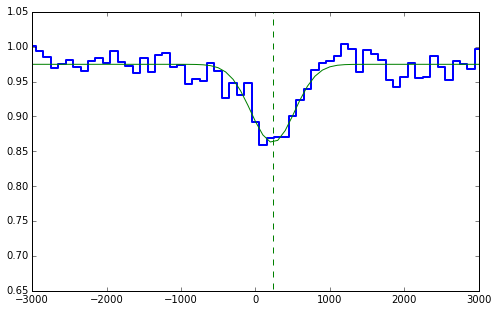

In [42]:
stack = fits.open('Output/QPQ9_zIRMgII_1334_mean.fits')
relativistic_equiv = u.doppler_relativistic(1334.5323*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_init = models.GaussianAbsorption1D(amplitude=0.2,mean=100.,stddev=300.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*g_init
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo.value,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
print('Error in amplitude =',np.sqrt(fit.fit_info['param_cov'][1][1]))
print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CII_MgII_mean_fit.dat')
model_final

## Median stack 

('Centroid velocity in km/s = ', Parameter('mean_1', value=119.496434872))


<CompoundModel2(amplitude_0=0.9853994071975105, amplitude_1=0.05348619453434846, mean_1=119.49643487195853, stddev_1=137.1813271899856)>

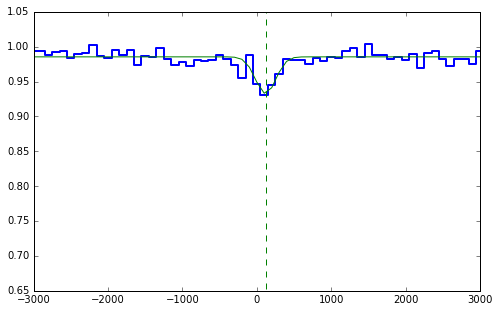

In [5]:
stack = fits.open('Output/QPQ9_zIRMgII_1334_med.fits')
relativistic_equiv = u.doppler_relativistic(1334.5323*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_init = models.GaussianAbsorption1D(amplitude=0.2,mean=100.,stddev=300.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*g_init
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CII_MgII_median_fit.dat')
model_final

# MgII, OIII stack

## Mean stack 

('Centroid velocity in km/s = ', Parameter('mean_1', value=209.659504075))


<CompoundModel57(amplitude_0=0.9539354570114796, amplitude_1=0.19137954318296543, mean_1=209.65950407468154, stddev_1=235.4380022094075, amplitude_2=0.1624577799714105, mean_2=978.6595040746815, stddev_2=235.4380022094075)>

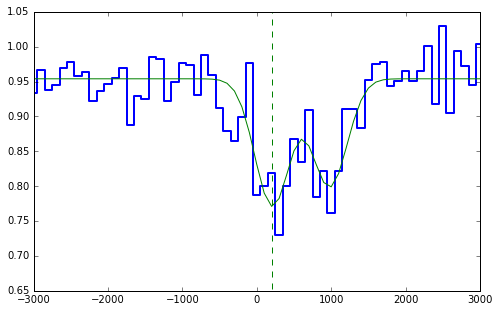

In [34]:
stack = fits.open('Output/QPQ9_zOIII_2796_mean.fits')
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.3,mean=200.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.15,mean=969.,stddev=250.)
c_init = models.Const1D(amplitude=0.95)
model_init = c_init*g_2796_init*g_2803_init
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'MgII_OIII_mean_fit.dat')
model_final

## Median stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=243.770553673))


<CompoundModel59(amplitude_0=0.9760841665330048, amplitude_1=0.1517703886651988, mean_1=243.7705536733073, stddev_1=175.49410138551147, amplitude_2=0.0612977920567321, mean_2=1012.7705536733073, stddev_2=175.49410138551147)>

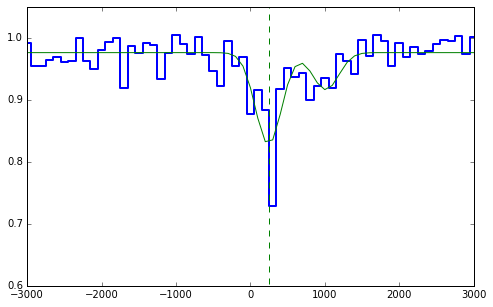

In [35]:
stack = fits.open('Output/QPQ9_zOIII_2796_med.fits')
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.3,mean=250.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.15,mean=1019.,stddev=250.)
c_init = models.Const1D(amplitude=0.95)
model_init = c_init*g_2796_init*g_2803_init
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.6,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'MgII_OIII_median_fit.dat')
model_final

# MgII, MgII stack 

## Mean stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=215.309638294))
('Error in centroid and dispersion = ', 39.794250057519129, 30.435602941196318)


<CompoundModel53(amplitude_0=0.9907120831902485, amplitude_1=0.08190967008087269, mean_1=215.3096382939954, stddev_1=295.095957110265, amplitude_2=0.06140421950684329, mean_2=984.3096382939954, stddev_2=295.095957110265)>

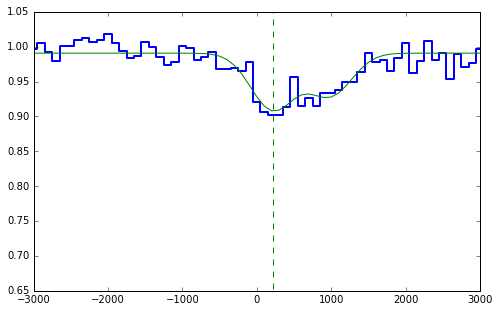

In [32]:
stack = fits.open('Output/QPQ9_zIRMgII_2796_mean.fits')
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.3,mean=400.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.15,mean=1169.,stddev=250.)
c_init = models.Const1D(amplitude=0.95)
model_init = c_init*g_2796_init*g_2803_init
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#for some reason this line failed
print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'MgII_MgII_mean_fit.dat')
model_final

## Median stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=120.701917808))


<CompoundModel55(amplitude_0=0.9910811022182671, amplitude_1=0.02986512864162725, mean_1=120.7019178078707, stddev_1=276.11765505124106, amplitude_2=0.02986512864162725, mean_2=889.7019178078707, stddev_2=276.11765505124106)>

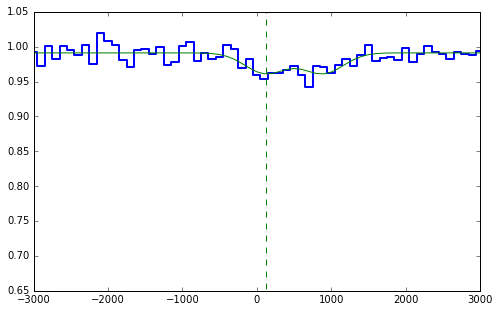

In [33]:
stack = fits.open('Output/QPQ9_zIRMgII_2796_med.fits')
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.1,mean=100.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.05,mean=869.,stddev=250.)
c_init = models.Const1D(amplitude=0.99)
model_init = c_init*g_2796_init*g_2803_init
def tie_amplitude2(model):
    amplitude_2 = model.amplitude_1
    return amplitude_2
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.amplitude_2.tied = tie_amplitude2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#For some reason this line failed
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'MgII_MgII_median_fit.dat')
model_final

# MgII at z = 1 stack

## Mean stack  

('Centroid velocity in km/s = ', Parameter('mean_1', value=-11.0114846073))


<CompoundModel69(amplitude_0=0.992815647302289, amplitude_1=0.03566230962133366, mean_1=-11.011484607315001, stddev_1=172.4128495111441, amplitude_2=0.025262334360866057, mean_2=757.988515392685, stddev_2=172.4128495111441)>

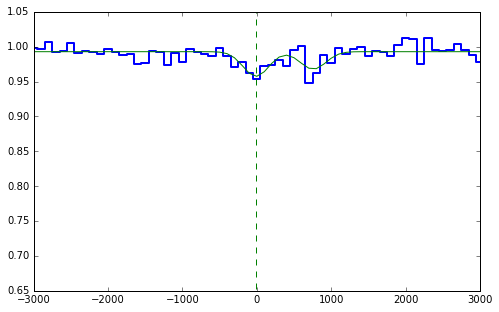

In [40]:
stack = fits.open('Output/QPQ9_zIRMgII_2796_z1_mean.fits')
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.3,mean=0.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.15,mean=769.,stddev=250.)
c_init = models.Const1D(amplitude=0.95)
model_init = c_init*g_2796_init*g_2803_init
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'MgII_z1_mean_fit.dat')
model_final

In [3]:
print(fit.fit_info['param_cov'])
model_final.param_names

[[  1.40682905e-04   4.99447689e-05  -6.31738043e-01]
 [  4.99447689e-05   3.59389607e+03  -2.36196703e-01]
 [ -6.31738043e-01  -2.36196703e-01   3.85551901e+03]]


(u'amplitude_0',
 u'amplitude_1',
 u'mean_1',
 u'stddev_1',
 u'amplitude_2',
 u'mean_2',
 u'stddev_2')

## Median stack 

('Centroid velocity in km/s = ', Parameter('mean_1', value=-101.385498587))


<CompoundModel71(amplitude_0=0.998431522218579, amplitude_1=0.016519108112235444, mean_1=-101.38549858662505, stddev_1=186.53182715565427, amplitude_2=0.012729884718598983, mean_2=667.6145014133749, stddev_2=186.53182715565427)>

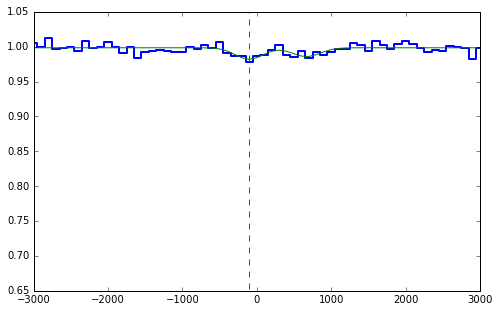

In [41]:
stack = fits.open('Output/QPQ9_zIRMgII_2796_z1_med.fits')
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.3,mean=0.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.15,mean=769.,stddev=250.)
c_init = models.Const1D(amplitude=0.95)
model_init = c_init*g_2796_init*g_2803_init
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'MgII_z1_median_fit.dat')
model_final

# CIV foreground quasar stack 

<CompoundModel92(slope_0=1.6216453676836206e-06, intercept_0=0.9835803072187345, amplitude_1=0.028672582135876, mean_1=-2512.039953476008, stddev_1=2079.834165724614, amplitude_2=0.028672582135876, mean_2=-2014.0399534760081, stddev_2=2079.834165724614)>

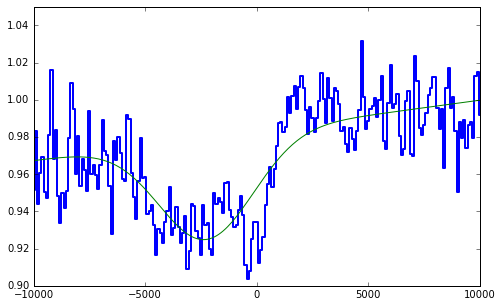

In [60]:
CIV_stack = fits.open('Output/QPQ9_1548_fg_mean.fits')
relativistic_equiv = u.doppler_relativistic(1548.195*u.AA)
velo = (CIV_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g1_1548_init = models.GaussianAbsorption1D(amplitude=0.05,mean=-4000.,stddev=1000.)
g1_1550_init = models.GaussianAbsorption1D(amplitude=0.05,mean=-4000.+498.,stddev=1000.)
#g2_1548_init = models.GaussianAbsorption1D(amplitude=0.01,mean=-400.,stddev=500.)
#g2_1550_init = models.GaussianAbsorption1D(amplitude=0.01,mean=-400.+498.,stddev=500.)
l_init = models.Linear1D(intercept=0.97,slope=0.00001)
#model_init = l_init*(g1_1548_init*g1_1550_init)*(g2_1548_init*g2_1550_init)
model_init = l_init*(g1_1548_init*g1_1550_init)
def tie_mean2(model):
    mean_2 = model.mean_1 + 498.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
def tie_amplitude2(model):
    amplitude_2 = model.amplitude_1
    return amplitude_2
#def tie_mean4(model):
#    mean_4 = model.mean_3 + 498.
#    return mean_4
#def tie_stddev4(model):
#    stddev_4 = model.stddev_3
#    return stddev_4
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
model_init.amplitude_2.tied = tie_amplitude2
#model_init.mean_4.tied = tie_mean4
#model_init.stddev_4.tied = tie_stddev4
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,CIV_stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, CIV_stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value, model_final(velo.value), label='Gaussian')
plt.axis([-10000,10000,0.90,1.05])
model_final
